# Execution Trace
- **Start Timestamp (UTC)**: 2025-01-17T06:03:20.376778+00:00
- **OS**: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024
- **Machine**: x86_64
- **Python Info**: 3.12.4-final0
- **Python Environment Hash**: 254ed744c6afa6cb7a82cb312f75f9fcd1c4da2c13d780212e30fa7339309c54
- **CAPTCHA**:

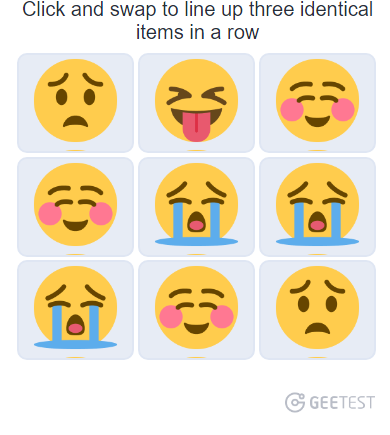

## Objective Identification

In [ ]:
def stage1(frames):
    # Step 1: Provide one-sentence visual description of each frame.
    describe(0, "Text instruction reads 'Click and swap to line up three identical items in a row'.")
    describe(1, "A 3x3 grid of emoji faces with varying expressions, including sad, laughing, blushing, and crying.")

    # Step 2: Identify the relationships between frames.
    relate(0, 1, "Frame 0 provides instructions for the task depicted in Frame 1.")

    # Step 3: Identify the sequential events and the final visual criteria.
    objective("Click and swap adjacent grid items to align three identical items in a row or column, following the instruction in Frame 0.")

## Structure Abstraction

In [ ]:
def stage2(frames):
    # Frame 0 is non-interactable because it provides instructions for Frame 1
    frame_0 = frames[0]
    
    # Frame 1 contains the grid of emoji faces
    frame_1 = frames[1]
    
    # Convert Frame 1 into a grid of swappable elements
    elements_grid = frame_1.grid(tiles=9)
    
    # Mark each element in the grid as SWAPPABLE
    for row in elements_grid:
        for element in row:
            element.set_element_as(interactable="SWAPPABLE")

## Solution Composition

In [ ]:
def stage3(frames):
    # Explore all possible swaps in the grid
    choices = explore(frames[1])
    
    # Iterate over each swap choice
    for choice in choices:
        grid = choice.grid
        
        # Check each row for three identical elements
        for row in grid:
            if match(row[0], row[1]) and match(row[1], row[2]):
                choice.swap()
                return
        
        # Check each column for three identical elements
        for col in zip(*grid):
            if match(col[0], col[1]) and match(col[1], col[2]):
                choice.swap()
                return